# Khai báo thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# If your charts have some problems, let see libraries version in requirements.txt based on Python 3.10.
# Uncomment to install libraries by command:
# !pip install -r requirements.txt

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [3]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 320 # 100 dpi hơi mờ nhé, chuẩn đăng bài Fanpage là từ 320dpi rồi.

Đọc dữ liệu

In [4]:
train = pd.read_csv('../data/train_preprocessed_DK.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc-missing
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,False
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,False
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4,False
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,289,16,121,4,1.777778,1.0,121.0,289,4,False
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,False


In [5]:
test = pd.read_csv('../data/test_preprocessed_DK.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,rez_esc-missing
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,...,0,16,9,0,1,2.25,0.25,272.25,16,False
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,...,256,1681,9,0,1,2.25,0.25,272.25,1681,False
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,...,289,1681,9,0,1,2.25,0.25,272.25,1681,False
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,...,256,3481,1,256,0,1.00,0.00,256.00,3481,False
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,121,324,1,0,1,0.25,64.00,NaN,324,False


In [6]:
all_data = pd.concat((train, test)).reset_index(drop=True)

# Khám phá dữ liệu

## Quan sát phân số dữ liệu

Độ tuổi của mọi người.

In [8]:
age_data = all_data[['age']].copy()
age_data['bin_age'] = age_data['age']
age_data.loc[age_data['age'] < 6, 'bin_age'] = 'Dưới 6 tuổi'
age_data.loc[age_data['age'] > 18, 'bin_age'] = 'Trên 18 tuổi'
age_data.loc[(age_data['age'] >= 6) & (age_data['age'] <= 18), 'bin_age'] = 'Từ 6 đến 18 tuổi'
age_data.sample(5)

,age,bin_age
4702,52,Trên 18 tuổi
27984,35,Trên 18 tuổi
1844,4,Dưới 6 tuổi
8802,66,Trên 18 tuổi
12081,64,Trên 18 tuổi


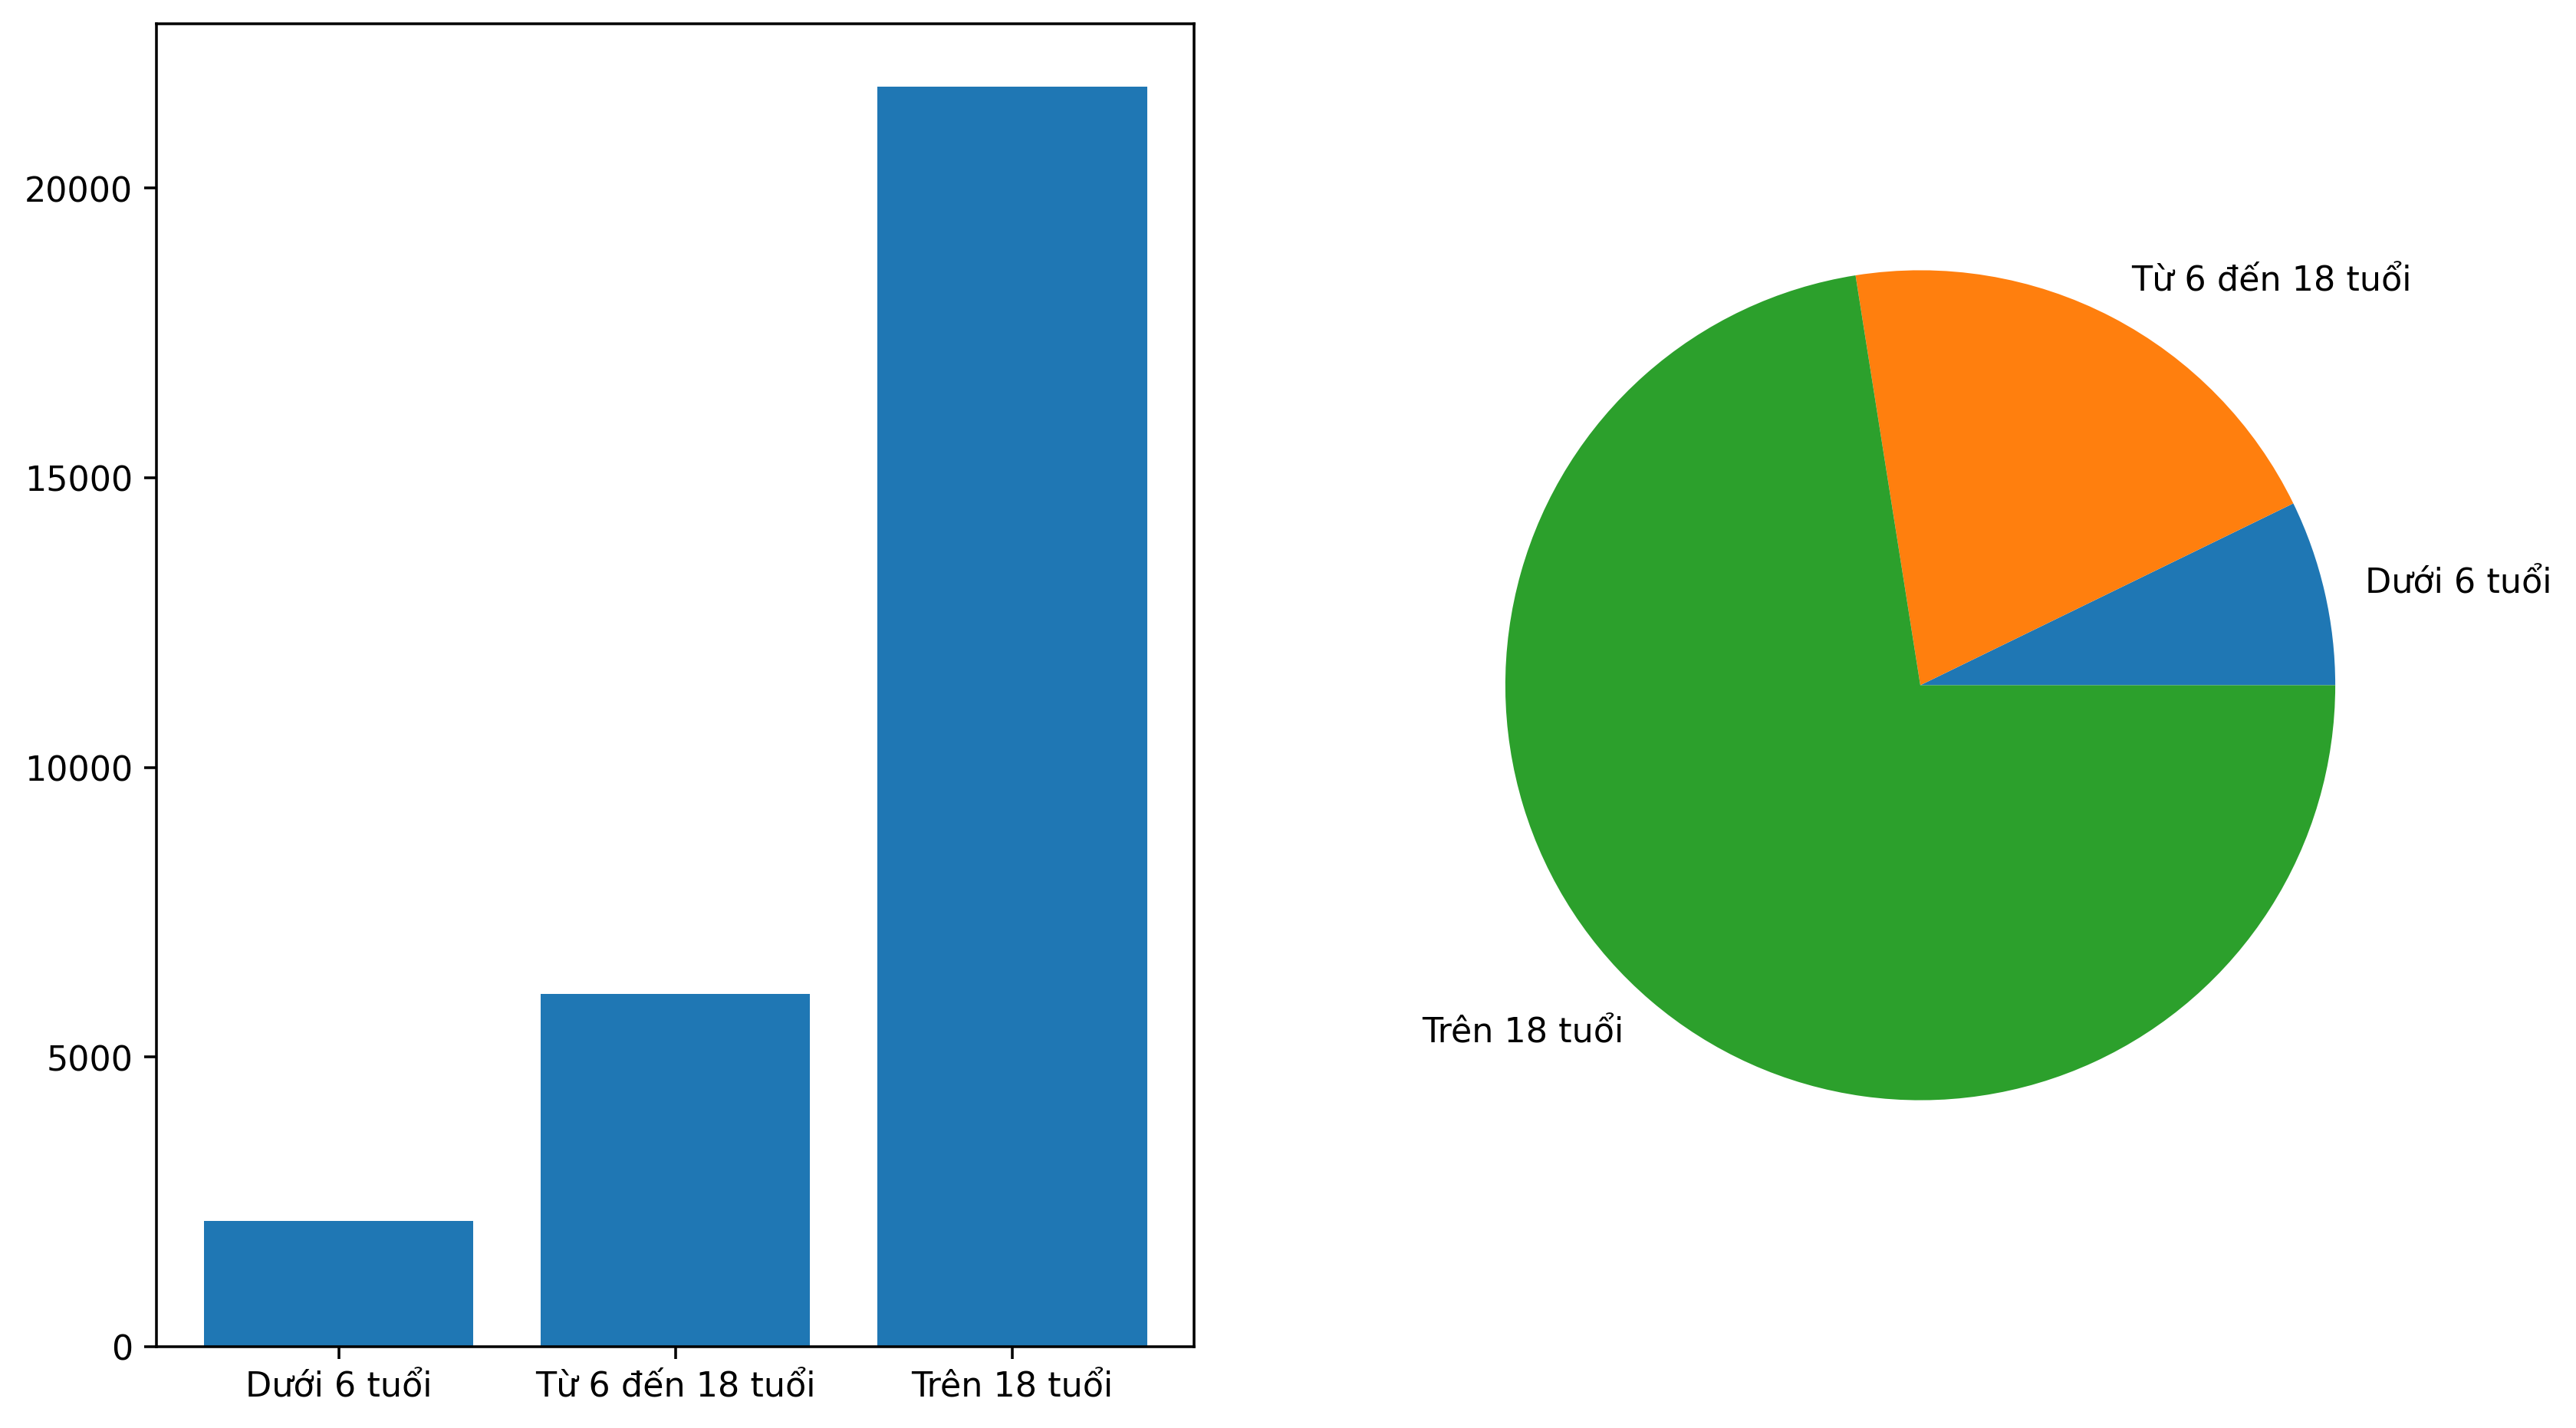

In [16]:
# Plot the bar chart and pie chart in the same subplot for 'age' column
fig, (ax1, ax2) = plt.subplots(1, 2)
age_count = age_data['bin_age'].value_counts(ascending=True)
ax1.bar(age_count.index, age_count.values);
ax2.pie(age_count.values, labels=age_count.index);